# Acquire and Prep

#### When we say "wrangle" we are referring to a combination of two steps of the pipeline that we are now familiarlized with:  Acquisition and Preparation.  Wrangling is the act of obtaining our data and ensuring that is ready for analysis and modeling.

### I am a university teacher, and I want to know when to worry about a student's progress. I want to be able to work with any students who are a high risk of failing the class, so that I can try to prevent that from happening. I have the grades of the three exams and the final grade from last semester's class. I am hoping I can build a prediction model that would be able to use those exams to predict the final grade +/- 5 points per student.

In [1]:
#hide warnings
import warnings
warnings.filterwarnings("ignore")

#imports to acquire and clean data
import pandas as pd
import numpy as np


#imports to visualize data
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#copied data from lesson to be read from clipboard to make into df
#only copied first 5 rows just to run through the examples
 student_id exam1 exam2 exam3 final_grade
0 1 100.0 90 95 96
1 2 98.0 93 96 95
2 3 85.0 83 87 87
3 4 83.0 80 86 85
4 5 93.0 90 96 97


In [7]:
#turned clipboard data into dataframe
df = pd.read_csv("student_grades.csv")

## Sample and Summarize

In [8]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [9]:
df.shape

(104, 5)

In [10]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


<div class="alert alert-block alert-success">
<b>Takeaways:</b>
<br>- exam 1 has 1 null value (RangeIndex-exam1)
<br>- exam 1 should likely be type of int64 once the null value is addressed
<br>- there is likely an odd value in exam 3, as it should be type of int64 but was read as an object value, so we need to locate that value
<br>-  given that there are limited attributes and limited observations with missing values, dropping the observations with missing values is probably a good way to go here   
</div>

In [19]:
df.exam3.value_counts()

96    16
78    16
75    15
95     8
94     8
87     8
86     8
85     8
70     8
79     7
Name: exam3, dtype: int64

In [12]:
print(df.isnull().sum())

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64


In [13]:
print(df.columns[df.isnull().any()])

Index(['exam1'], dtype='object')


In [14]:
df.exam3.value_counts(sort=True, ascending=True)

       1
94     8
87     8
86     8
95     8
79     8
70     8
85     8
75    15
96    16
78    16
Name: exam3, dtype: int64

In [15]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [17]:
df = df.dropna().astype('int')

In [18]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [20]:
df['exam3'] = df['exam3'].astype('int')

In [21]:
df['exam1'] = df['exam1'].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [23]:
df.tail()

,student_id,exam1,exam2,exam3,final_grade
99,100,70,65,78,77
100,101,62,70,79,70
101,102,58,65,70,68
102,103,57,65,75,65
103,104,70,75,78,72


In [24]:
#student id not really providing anything valuable to us right now,
#so for our purposes right now we will drop
df = df.drop(columns='student_id')

In [26]:
#histograms for visual reference of what we are looking at
#plt.Figure(figsize=15,4)
#i=index, val = value
#why are we using this?  depend on the shape of this to determine the shape of our subplots
for i, val in enumerate(list(df.columns)): #enumerate is going to return an index of the thing in the thing
    print(i)
    print(val)

0
exam1
1
exam2
2
exam3
3
final_grade


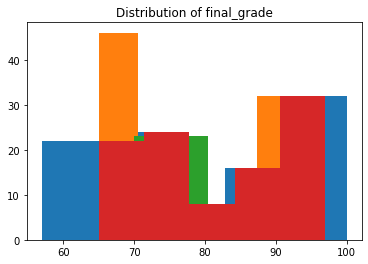

In [35]:
plt.Figure(figsize=(10,20))
for i, val in enumerate(list(df.columns)):
    plotnum = i + 1
    #plt.subplot(1, 4, plotnum )  #one row 4 columns (row, column, position)
    plt.title(f'Distribution of {val}')
    plt.hist(df[val], bins=5

<AxesSubplot:>

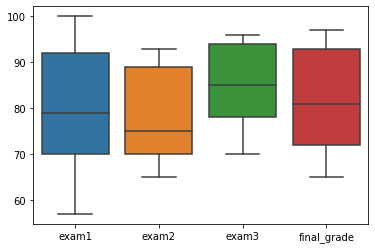

In [36]:
sns.boxplot(data=df)

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
train_val, test = train_test_split(df, train_size=0.8, random_state=3435)



In [39]:
train, validate = train_test_split(train_val, train_size=0.7, random_state=3435)



In [40]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 7 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   exam1        56 non-null     int64
 1   exam2        56 non-null     int64
 2   exam3        56 non-null     int64
 3   final_grade  56 non-null     int64
dtypes: int64(4)
memory usage: 2.2 KB


In [43]:
def acquire():
    '''
    Grab our data from a path, read in from csv
    '''
    df = pd.read_csv("student_grades.csv")
    return df
def clean_grades(df):
    '''
    Takes in a df of student exam grades and cleans the data appropriately by dropping null
    values, replacing whitespace, and converting data to numerical data
    types as well as dropping student_id colum from the dataframe
    
    return: df, a cleaned pandas dataframe
    '''
    
    df['exam3']= df['exam3'].replace(r'^\s*$', np.nan, regex=True)
    df = dropna()
    df['exam3'] = df['exam3'].astype('int')
    df['exam1'] = df['exam1'].astype('int')
    df.drop(columns='student_id')
    return df
def split_data(df):
    '''
    split our data,
    takes in a pandas dataframe,
    returns: three pandas dataframes, train, test, and validate
    '''
    train_val, test = train_test_split(df, train_size=0.8, random_state=3435, stratify=df.final_grade)
    train, validate = train_test_split(train_val, train_size=0.7, random_state=3435,stratify=df.final_grade )


In [44]:
def wrangle_grades():
    '''
    wrangle_grades will read in out strudent grades as a pandas dataframe
    clean the data,
    split the data,
    return: train, validate, test sets of pandas dataframes
    from student grades, stratified on final_grade
    '''
    df = clean_grades(acquire_grades())
    return split_data(df)